# 01. Neural Network Regression with TensorFlow



## Typical architecture of a regresison neural network


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*



## Improving a model

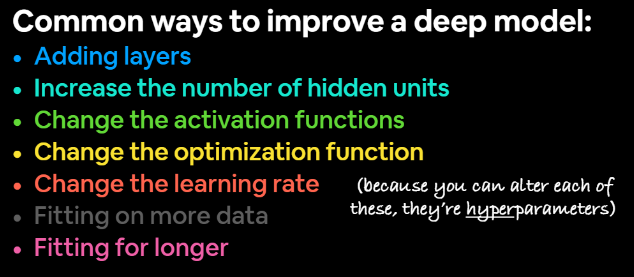

## Boston Price Dataset

Variables in order:

| **Column** | **Description** |
| -----   | ------------- |
| CRIM    | per capita crime rate by town |
| ZN      | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS   | proportion of non-retail business acres per town |
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0  |otherwise) |
| NOX     | nitric oxides concentration (parts per 10 million) |
| RM      | average number of rooms per dwelling |
| AGE     | proportion of owner-occupied units built prior to 1940 |
| DIS     | weighted distances to five Boston employment centres |
| RAD     | index of accessibility to radial highways |
| TAX     | full-value property-tax rate per 10,000 dollars |
| PTRATIO | pupil-teacher ratio by town |
| B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT   | % lower status of the population |
| HOUSE_PRICE    | Median value of owner-occupied homes in $1000's |


Importing the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)



In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
columns = ["PC_CRIME","ZN","INDUS","CHARLES_RIVER","NOX","AVG_ROOM","AGE",
           "DISTANCE","RAD_HIGHWAYS","TAX_RATE","TEACHER_RATIO","PC_BLACKS","POOR_STAT"]
target = ["HOUSE_PRICE"]

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

65536/57026 [==================================] - 0s 0us/step


In [4]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [5]:
X_train.head()

,PC_CRIME,ZN,INDUS,CHARLES_RIVER,NOX,AVG_ROOM,AGE,DISTANCE,RAD_HIGHWAYS,TAX_RATE,TEACHER_RATIO,PC_BLACKS,POOR_STAT
0,1.23,0.00,8.14,0.00,0.54,6.14,91.70,3.98,4.00,307.00,21.00,396.90,18.72
1,0.02,82.50,2.03,0.00,0.41,7.61,15.70,6.27,2.00,348.00,14.70,395.38,3.11
2,4.90,0.00,18.10,0.00,0.63,4.97,100.00,1.33,24.00,666.00,20.20,375.52,3.26
3,0.04,0.00,5.19,0.00,0.52,6.04,34.50,5.99,5.00,224.00,20.20,396.90,8.01
4,3.69,0.00,18.10,0.00,0.71,6.38,88.40,2.57,24.00,666.00,20.20,391.43,14.65


In [6]:
X_train.isnull().sum()

PC_CRIME         0
ZN               0
INDUS            0
CHARLES_RIVER    0
NOX              0
AVG_ROOM         0
AGE              0
DISTANCE         0
RAD_HIGHWAYS     0
TAX_RATE         0
TEACHER_RATIO    0
PC_BLACKS        0
POOR_STAT        0
dtype: int64

# Normalize Data

In [7]:
#Age Groups
#group = (10, 28, 36, 44, 120)
#cats = ['STUDENT', 'YOUNG', 'ADULT', 'OLD']
#insurance["age_group"] = pd.cut(insurance.age, group, labels=cats)

In [8]:
X_train.columns

Index(['PC_CRIME', 'ZN', 'INDUS', 'CHARLES_RIVER', 'NOX', 'AVG_ROOM', 'AGE',
       'DISTANCE', 'RAD_HIGHWAYS', 'TAX_RATE', 'TEACHER_RATIO', 'PC_BLACKS',
       'POOR_STAT'],
      dtype='object')

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

target = ["charges"]

continuous_columns = ["PC_CRIME","ZN","INDUS","NOX","AVG_ROOM","AGE","DISTANCE",
                      "TAX_RATE","TEACHER_RATIO","PC_BLACKS","POOR_STAT"]
categorical_columns = ["RAD_HIGHWAYS", "CHARLES_RIVER"]

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), continuous_columns), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False), categorical_columns)
)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [10]:
print("X_train",X_train_normal.shape, "Type:", type(X_train_normal))
print("X_test",X_test_normal.shape, "Type:", type(X_test_normal))

X_train (404, 21) Type: <class 'numpy.ndarray'>
X_test (102, 21) Type: <class 'numpy.ndarray'>


In [11]:
ct.get_feature_names_out()

array(['minmaxscaler__PC_CRIME', 'minmaxscaler__ZN',
       'minmaxscaler__INDUS', 'minmaxscaler__NOX',
       'minmaxscaler__AVG_ROOM', 'minmaxscaler__AGE',
       'minmaxscaler__DISTANCE', 'minmaxscaler__TAX_RATE',
       'minmaxscaler__TEACHER_RATIO', 'minmaxscaler__PC_BLACKS',
       'minmaxscaler__POOR_STAT', 'onehotencoder__RAD_HIGHWAYS_1.0',
       'onehotencoder__RAD_HIGHWAYS_2.0',
       'onehotencoder__RAD_HIGHWAYS_3.0',
       'onehotencoder__RAD_HIGHWAYS_4.0',
       'onehotencoder__RAD_HIGHWAYS_5.0',
       'onehotencoder__RAD_HIGHWAYS_6.0',
       'onehotencoder__RAD_HIGHWAYS_7.0',
       'onehotencoder__RAD_HIGHWAYS_8.0',
       'onehotencoder__RAD_HIGHWAYS_24.0',
       'onehotencoder__CHARLES_RIVER_1.0'], dtype=object)

In [12]:
#Converter para DataFrame
X_train_normal = pd.DataFrame(X_train_normal, columns=ct.get_feature_names_out())
X_test_normal = pd.DataFrame(X_test_normal, columns=ct.get_feature_names_out())

In [13]:
X_train_normal.head()

,minmaxscaler__PC_CRIME,minmaxscaler__ZN,minmaxscaler__INDUS,minmaxscaler__NOX,minmaxscaler__AVG_ROOM,minmaxscaler__AGE,minmaxscaler__DISTANCE,minmaxscaler__TAX_RATE,minmaxscaler__TEACHER_RATIO,minmaxscaler__PC_BLACKS,...,onehotencoder__RAD_HIGHWAYS_1.0,onehotencoder__RAD_HIGHWAYS_2.0,onehotencoder__RAD_HIGHWAYS_3.0,onehotencoder__RAD_HIGHWAYS_4.0,onehotencoder__RAD_HIGHWAYS_5.0,onehotencoder__RAD_HIGHWAYS_6.0,onehotencoder__RAD_HIGHWAYS_7.0,onehotencoder__RAD_HIGHWAYS_8.0,onehotencoder__RAD_HIGHWAYS_24.0,onehotencoder__CHARLES_RIVER_1.0
0,0.01,0.00,0.28,0.31,0.50,0.91,0.30,0.23,0.89,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.83,0.06,0.06,0.78,0.13,0.54,0.31,0.22,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.05,0.00,0.65,0.51,0.27,1.00,0.02,0.91,0.81,0.95,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.17,0.27,0.48,0.33,0.51,0.07,0.81,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.04,0.00,0.65,0.67,0.55,0.88,0.15,0.91,0.81,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


# Baseline Model


In [14]:
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, SGDRegressor, ElasticNet,LogisticRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [15]:
df_results = pd.DataFrame(columns=['Modelo', 'R2', "mean_absolute_error","rmse", "mean_squared_error"])

model_xgb = XGBRegressor(colsample_bytree=0.7, 
                          #gamma=0.0468,
                          learning_rate=0.05, 
                          max_depth=3,
                          #min_child_weight=2.0, 
                          n_estimators=200,
                          reg_alpha=0.5, 
                          reg_lambda=0.88,
                          subsample=1,
                          random_state=8, 
                          nthread = -1
                        )

regressores = {
    'XGBRegressor': model_xgb #XGBRegressor(learning_rate=0.05,max_depth=5, n_estimators=200)
    ,'Lasso': Lasso(alpha=0.0005,random_state=8)
    #,'SGDRegressor': SGDRegressor(random_state=8)
    ,'ElasticNet': ElasticNet(alpha=0.0005,random_state=8)
    ,'GradientBoosting': GradientBoostingRegressor(learning_rate=0.04,n_estimators=100,random_state=8)
    ,'Ridge': Ridge( solver="cholesky",random_state=8)
    ,'AdaBoostRegressor': AdaBoostRegressor(n_estimators=500,learning_rate=0.05,random_state=8)
    #,'CatBoostRegressor': CatBoostRegressor(iterations=200,learning_rate=0.05,depth=2,l2_leaf_reg= 0.2,verbose=False,random_state=8)
}

modelos_treinados = {}

for no_modelo, modelo in regressores.items():
  dict_result = {}
  my_pipeline = Pipeline(
      steps=[
              ('model', modelo)
      ]
  )

  model_to_deploy = my_pipeline.fit(X_train, y_train)

  #Calcular dados de treino
  y_pred = my_pipeline.predict(X_test)

  dict_result['Modelo'] = no_modelo
  dict_result['R2'] = r2_score(y_test, y_pred)
  dict_result["mean_absolute_error"] = mean_absolute_error(y_test, y_pred)
  dict_result["rmse"] = np.sqrt(mean_squared_error(y_test, y_pred))
  dict_result["mean_squared_error"] = mean_squared_error(y_test, y_pred)

  df_results = df_results.append(dict_result, ignore_index=True)

[23:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
df_results.sort_values('mean_absolute_error', ascending=True)

,Modelo,R2,mean_absolute_error,rmse,mean_squared_error
0,XGBRegressor,0.83,2.46,3.73,13.90
3,GradientBoosting,0.83,2.70,3.80,14.47
5,AdaBoostRegressor,0.77,3.22,4.38,19.17
4,Ridge,0.73,3.40,4.75,22.55
2,ElasticNet,0.72,3.45,4.80,23.04
1,Lasso,0.72,3.46,4.81,23.17


# Modeling Neural Network

In [17]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
boston_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(75, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu") # 1 unit (important for output layer)
])

# Compile the model
boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(lr=0.005),
                     #optimizer=tf.keras.optimizers.RMSprop(lr=0.01),
                     metrics=['mae', 'mse'])

#Verificar o melhor Learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 

# O parâmetro patience é a quantidade de epochs para checar as melhoras
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

# Callback to save the best weights during training process
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Fit the model and save the history (we can plot this)
history = boston_model.fit(X_train_normal,
                           y_train,
                           epochs=500,
                           validation_data=(X_test_normal, y_test),
                           callbacks=[model_checkpoint_callback, early_stop],
                           verbose=0)

# The model weights (that are considered the best) are loaded into the model.
boston_model.load_weights(checkpoint_filepath)

In [21]:
# Evaluate the model
boston_model.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 1.9988 - mae: 1.9988 - mse: 11.9091


[1.9987679719924927, 1.9987679719924927, 11.90910530090332]

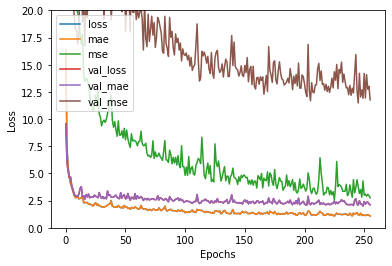

In [22]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.ylim(0, 20);

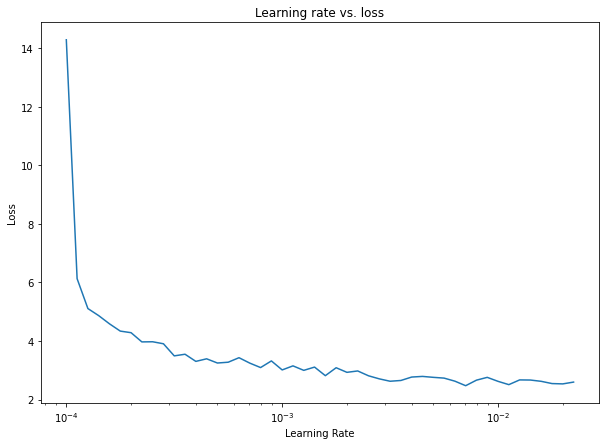

In [39]:
# Plot the learning rate versus the loss
epochs = len(history.history["loss"])
lrs = 1e-4 * (10 ** (np.arange(epochs)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [18]:
pd.DataFrame(y_test).describe()

,0
count,102.00
mean,23.08
std,9.17
min,5.60
25%,18.65
50%,21.95
75%,27.08
max,50.00


In [19]:
pd.DataFrame(y_train).describe()

,0
count,404.00
mean,22.40
std,9.21
min,5.00
25%,16.68
50%,20.75
75%,24.80
max,50.00


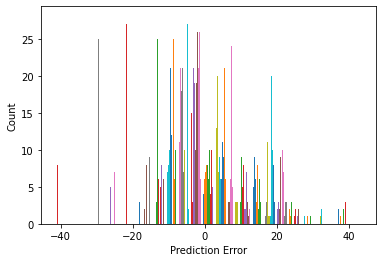

In [23]:
y_pred = boston_model.predict(X_test_normal)
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")